# Create the model based on  college SAT requirements 

This notebook is about creating a model to predict earnings ten years after college graduation based on the college's admissions minumum SAT score requirement.

Models will be created for both mean earnings and median earnings.

We will attempt to create models from the data using three techinques from Sci Kit Learn: KNN, SVC, CNN

In [110]:
# For pulling the data
import pandas as pd

# For SKLearn techniques
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# For visualizations
import matplotlib.pyplot as plt

## Create the models for mean earnings

In [111]:
# Pull in the data
df = pd.read_csv('Data/data_for_SAT_model.csv')
df.head()

,UNITID,mean_earnings_after10,median_earnings_after10,Sat_Mp_Critical_Reading,Sat_Mp_Math
0,100654,35500,31000,425.0,420.0
1,100663,48400,41200,560.0,575.0
2,100706,52000,46700,590.0,610.0
3,100724,30600,27700,415.0,410.0
4,100751,51600,44500,550.0,555.0


### KNN

In [112]:
# Seaparte the target data from the predictor data and drop the 'name' and 'group' columns
target = df['mean_earnings_after10']
data = df.drop(['UNITID', 'median_earnings_after10', 'mean_earnings_after10'], axis = 1)
data.tail()
len(data)

1203

In [113]:
# Create bins for the target data based on the federal taxable income brackets
bins = [0, 9525, 38700, 82500, 157500]
target = pd.cut(target, bins=bins)

bin_target = []
# Convert these values to strings for OneHotEncoding
for value in target:
    value = str(value)
    bin_target.append(value)

bin_target = pd.Series(bin_target)
target = bin_target

In [114]:
# Split the data sets into test and training subsets
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

# Check to see how the data was split
print(f'The training set is {len(X_train)} rows and testing set is {len(X_test)} rows.')


The training set is 902 rows and testing set is 301 rows.


In [115]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
#     print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

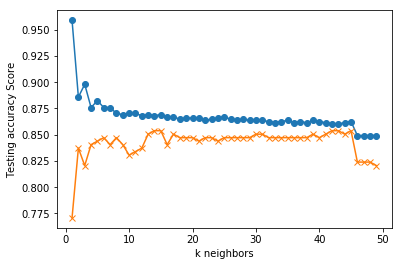

In [116]:
# Visualize the data with a graph
plt.plot(range(1, 50, 1), train_scores, marker='o')
plt.plot(range(1, 50, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Here we created 50 models using k neighbors ranging from 1 to 50, hitting each value. It looks like the model offers the best accuracy when the test data is compared to about 45 of the "closest" neighbors.

## SVC

In [117]:
# Create the SVN model and fit it to the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [118]:
# Make predictions
predictions = model.predict(X_test)
model.score(X_test, y_test)

0.8205980066445183

### Create a way for users to predict their own outcomes

In [119]:
sat_math = int(input(f'What was your best SAT math score? '))
sat_reading = int(input(f'What was your best SAT reading score? '))

predictor_data = pd.DataFrame([{'Sat_Mp_Critical_Reading':sat_math,
                               'Sat_Mp_Math':sat_reading}])

What was your best SAT math score? 567
What was your best SAT reading score? 678


In [122]:
# user_predictions = model.predict(predictor_data)
# user_predictions
print(f'You might reasonably expect your earnings ten years after graduation to be in this range {user_predictions}.')


You might reasonably expect your earnings ten years after graduation to be in this range ['(38700, 82500]'].
